In [1]:
import cx_Oracle
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import csv
import warnings
warnings.filterwarnings('ignore')
plt.style.use('seaborn')
plt.rc('font', family = 'Malgun Gothic') # 한글 입력
plt.rcParams['axes.unicode_minus'] = False # 글꼴 변경시 마이너스 표기 가능으로 처리
# 계절성 보정 사용자 함수

def new_seasonal_scaled(df):
    df1 = df.copy()
    df1.loc[df1['기'] == '1기', '총구매액'] = np.round(df1.loc[df1['기'] == '1기', '총구매액'] / 0.9476399112)
    df1.loc[df1['기'] == '2기', '총구매액'] = np.round(df1.loc[df1['기'] == '2기', '총구매액'] / 0.9785290501)
    df1.loc[df1['기'] == '3기', '총구매액'] = np.round(df1.loc[df1['기'] == '3기', '총구매액'] / 0.9072731695)
    df1.loc[df1['기'] == '4기', '총구매액'] = np.round(df1.loc[df1['기'] == '4기', '총구매액'] / 1.166557869)
    df1.loc[df1['기'] == '5기', '총구매액'] = np.round(df1.loc[df1['기'] == '5기', '총구매액'] / 0.9748289537)
    df1.loc[df1['기'] == '6기', '총구매액'] = np.round(df1.loc[df1['기'] == '6기', '총구매액'] / 0.9784250528)
    df1.loc[df1['기'] == '7기', '총구매액'] = np.round(df1.loc[df1['기'] == '7기', '총구매액'] / 0.912781587)
    df1.loc[df1['기'] == '8기', '총구매액'] = np.round(df1.loc[df1['기'] == '8기', '총구매액'] / 1.133964406)
    df1['총구매액'] = df1['총구매액'].astype('int64')
    return df1 
# 고정고객으로 정의한 고객 정보 불러오기
con = cx_Oracle.connect('LM_PDB/LM@localhost:1521/xepdb1')
cursor = con.cursor()
sql = '''SELECT a.고객번호, a.성별, a.연령대, d.지역, a.세분류명, a.분류, b.고객구분, c.기, sum(a.구매금액) "총구매액"
FROM LCL a
JOIN 증감고객 b ON a.고객번호 = b.고객번호
JOIN 기기 c ON a.연도 = c.연도 AND a.분기 = c.분기
JOIN CUSTDEMO d ON a.고객번호 = d.고객번호 AND a.성별 = d.성별 AND a.연령대 = d.연령대 AND a.거주지역 = d.거주지역
GROUP BY a.고객번호, a.성별, a.연령대, d.지역, a.세분류명, a.분류, b.고객구분, c.기
ORDER BY a.고객번호, a.성별, a.연령대, d.지역, a.세분류명, a.분류, b.고객구분, c.기'''
cursor.execute(sql)
x = cursor.fetchall()
columns = ['고객번호', '성별', '연령대', '지역', '세분류명', '분류', '고객구분','기','총구매액']
df_all = pd.DataFrame(x, columns = columns)
cursor.close()
con.commit()
con.close()
df_all = seasonal_scaled(df_all).copy()
display(df_all.head())

DatabaseError: ORA-00942: 테이블 또는 뷰가 존재하지 않습니다

In [5]:
# 2014, 2015, 2년 합산 매출, 증감률

con = cx_Oracle .connect('LM_PDB/LM@localhost:1521/xepdb1')
cursor = con.cursor()
sql ='''select a.*, nvl(채널이용횟수, 0) 채널이용횟수, nvl(경쟁사이용횟수, 0) 경쟁사이용횟수, nvl(멤버십가입개수, 0) 멤버십가입개수
from
고정고객 a
left outer join 
(SELECT 고객번호, SUM(이용횟수) 채널이용횟수 FROM CHANNEL
GROUP BY 고객번호) b on a.고객번호 = b.고객번호
left outer join 
(SELECT 고객번호, COUNT(고객번호) 경쟁사이용횟수 FROM COMPET
GROUP BY 고객번호) c on a.고객번호 = c.고객번호
left outer join
(select 고객번호, count(고객번호) 멤버십가입개수 FROM membership
group by 고객번호) d on a.고객번호 = d.고객번호'''
cursor.execute(sql)
x = cursor.fetchall()
columns = ['고객번호','이용금액 1분기', '이용금액 2분기','이용금액 3분기', '이용금액 4분기','이용금액 5분기','이용금액 6분기','이용금액 7분기', '이용금액 8분기','고객구분', '채널이용횟수', '경쟁사이용횟수', '멤버십가입개수']
df1 = pd.DataFrame(x,columns=columns)
display(df1)
cursor.close()
con.commit()
con.close()

,고객번호,이용금액 1분기,이용금액 2분기,이용금액 3분기,이용금액 4분기,이용금액 5분기,이용금액 6분기,이용금액 7분기,이용금액 8분기,고객구분,채널이용횟수,경쟁사이용횟수,멤버십가입개수
0,00001,9646692,11020383,11883466,20003090,9543197,8784914,8552517,4670286,감소,0,15,0
1,00002,14903836,10423564,16358006,6069926,18958690,9515425,15165293,10583419,증가,0,8,0
2,00003,319512,560467,714435,338060,286522,319871,461246,227609,증가,0,0,0
3,00004,1382005,3814361,2683216,1562803,1782151,1961974,2330363,1419926,증가,0,3,0
4,00006,2285685,3183640,3486572,2529507,3712686,2830897,3854256,2825388,증가,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
18861,15634,6877668,5470984,7062720,14416355,44238455,11953066,19315703,15966657,증가,39,0,0
18862,15635,1483957,1546699,1728443,1078146,1546211,1616770,1513698,873066,증가,35,0,1
18863,15636,13810436,9028592,16527139,32063321,35312236,23991812,13619622,30977489,감소,0,0,1
18864,15637,17284171,8752995,10464313,6707228,6815308,8317489,9760155,6898629,감소,0,3,1


Text(0.5, 1.0, '감소고객')

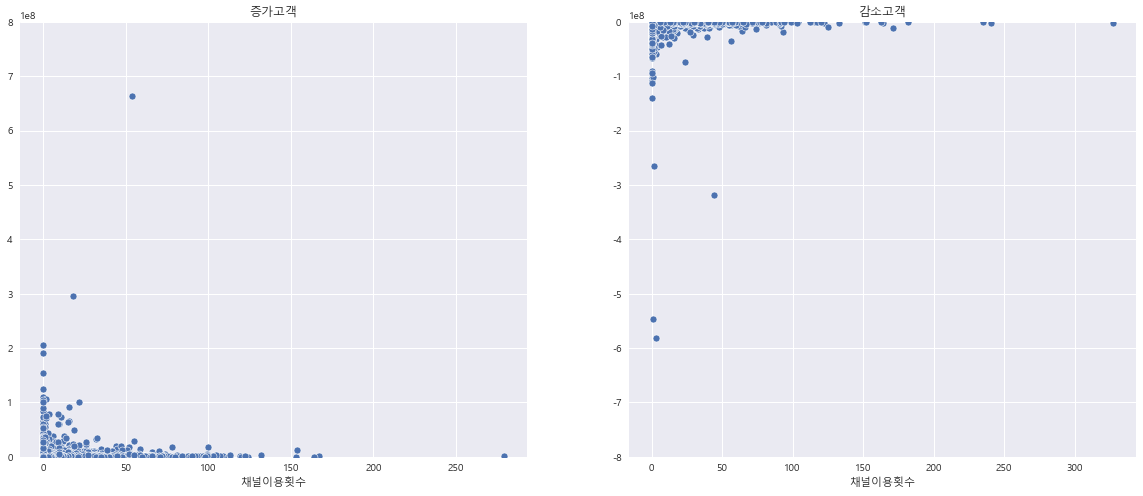

In [6]:
# 채널이용횟수와 증감 사이의 관계
plt.figure(figsize=(20,8))
plt.subplot(1, 2, 1) 
sns.scatterplot(data=df1.loc[df1.고객구분 == '증가'], x='채널이용횟수', y = df1['이용금액 7분기']-df1['이용금액 1분기'])
plt.ylim(0,8*1e8)
plt.title('증가고객')

plt.subplot(1, 2, 2) 
sns.scatterplot(data=df1.loc[df1.고객구분 == '감소'], x='채널이용횟수', y = df1['이용금액 7분기']-df1['이용금액 1분기'])
plt.ylim(-8*1e8,0)
plt.title('감소고객')

Text(0.5, 1.0, '감소고객')

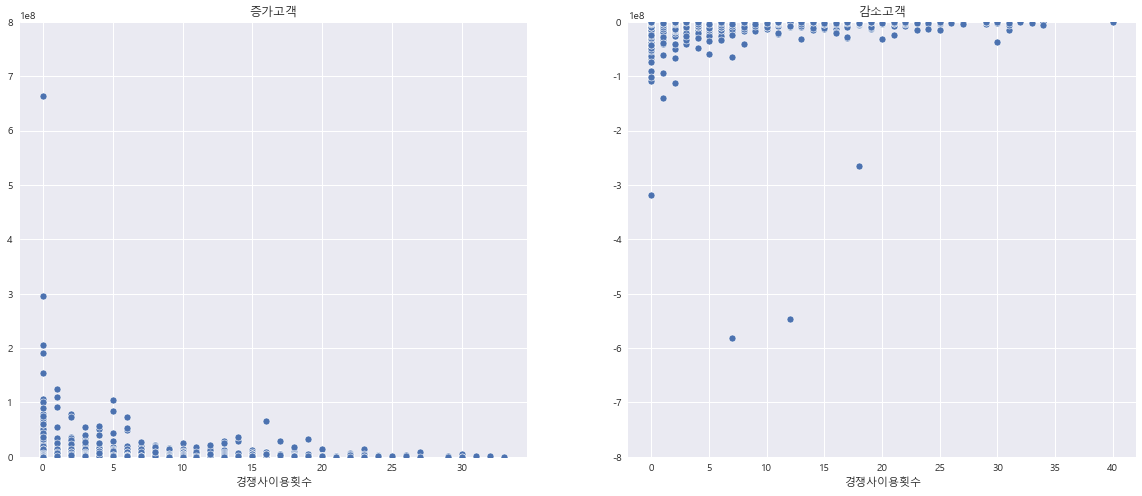

In [29]:
# 경쟁사이용횟수와 증감 사이의 관계
plt.figure(figsize=(20,8))
plt.subplot(1, 2, 1) 
sns.scatterplot(data=df1.loc[df1.고객구분 == '증가'], x='경쟁사이용횟수', y = df1['이용금액 7분기']-df1['이용금액 1분기'])
plt.ylim(0,8*1e8)
plt.title('증가고객')

plt.subplot(1, 2, 2) 
sns.scatterplot(data=df1.loc[df1.고객구분 == '감소'], x='경쟁사이용횟수', y = df1['이용금액 7분기']-df1['이용금액 1분기'])
plt.ylim(-8*1e8,0)
plt.title('감소고객')

Text(0.5, 1.0, '감소고객')

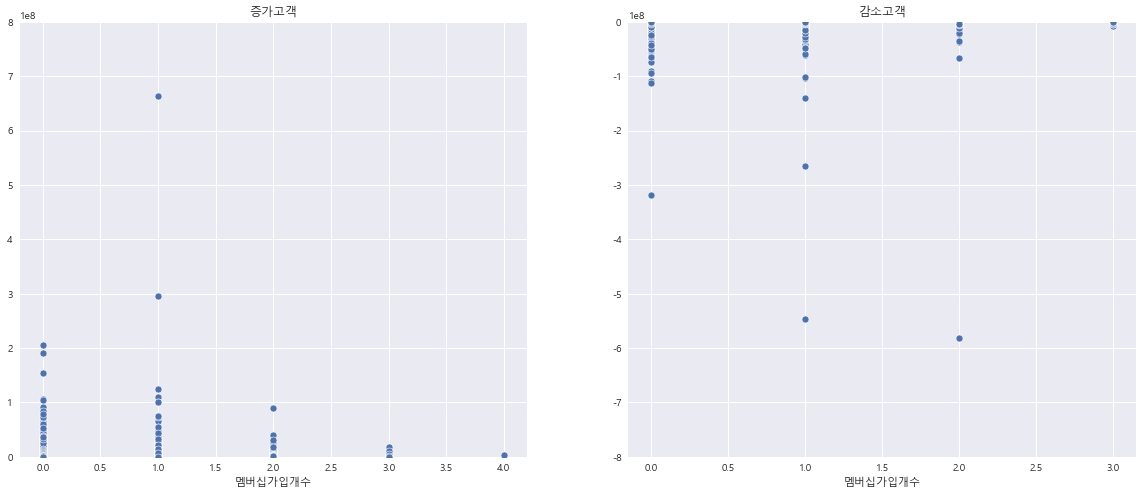

In [31]:
# 멤버십가입개수와 증감 사이의 관계
plt.figure(figsize=(20,8))
plt.subplot(1, 2, 1) 
sns.scatterplot(data=df1.loc[df1.고객구분 == '증가'], x='멤버십가입개수', y = df1['이용금액 7분기']-df1['이용금액 1분기'])
plt.ylim(0,8*1e8)
plt.title('증가고객')

plt.subplot(1, 2, 2) 
sns.scatterplot(data=df1.loc[df1.고객구분 == '감소'], x='멤버십가입개수', y = df1['이용금액 7분기']-df1['이용금액 1분기'])
plt.ylim(-8*1e8,0)
plt.title('감소고객')

Text(0.5, 1.0, '증가고객')

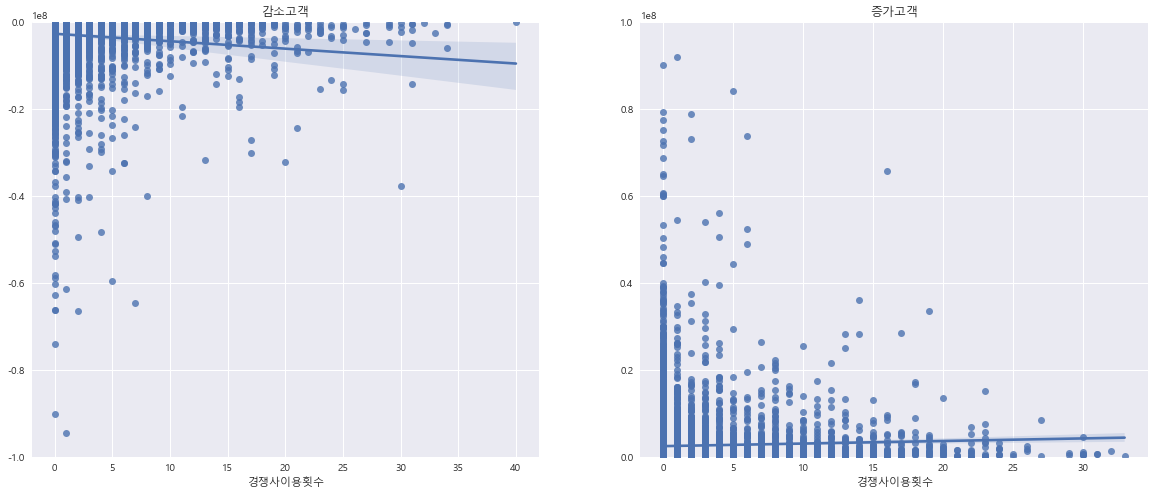

In [7]:
# 경쟁사이용횟수와 증감 사이의 관계
plt.figure(figsize=(20,8))
plt.subplot(1, 2, 1) 
df_down = df1.loc[df1.고객구분 == '감소']
sns.regplot(data=df_down, x='경쟁사이용횟수', y = df_down['이용금액 7분기']-df_down['이용금액 1분기'])
plt.ylim(-1*1e8,0)
plt.title('감소고객')

plt.subplot(1, 2, 2) 
df_up = df1.loc[df1.고객구분 == '증가']
sns.regplot(data=df_up, x='경쟁사이용횟수', y = df_up['이용금액 7분기']-df_up['이용금액 1분기'])
plt.ylim(0,1*1e8)
plt.title('증가고객')


Text(0.5, 1.0, '증가고객')

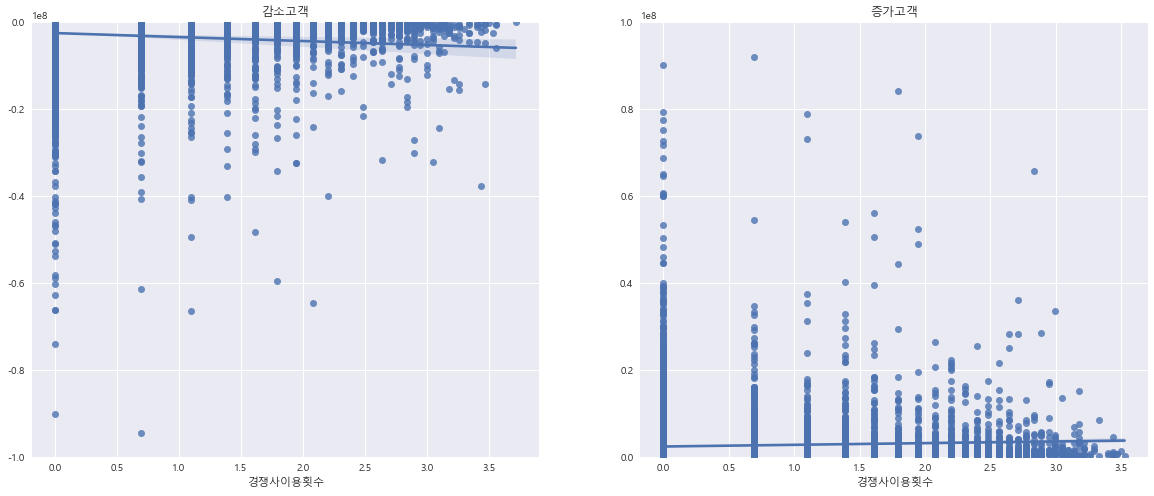

In [16]:
# 경쟁사이용횟수와 증감 사이의 관계
plt.figure(figsize=(20,8))
plt.subplot(1, 2, 1) 
df_down = df1.loc[df1.고객구분 == '감소']
sns.regplot(data=df_down, x=np.log1p(df_down['경쟁사이용횟수']), y = df_down['이용금액 7분기']-df_down['이용금액 1분기'])
plt.ylim(-1*1e8,0)
plt.title('감소고객')

plt.subplot(1, 2, 2) 
df_up = df1.loc[df1.고객구분 == '증가']
sns.regplot(data=df_up, x=np.log1p(df_up['경쟁사이용횟수']), y = df_up['이용금액 7분기']-df_up['이용금액 1분기'])
plt.ylim(0,1*1e8)
plt.title('증가고객')


Text(0.5, 1.0, '증가고객')

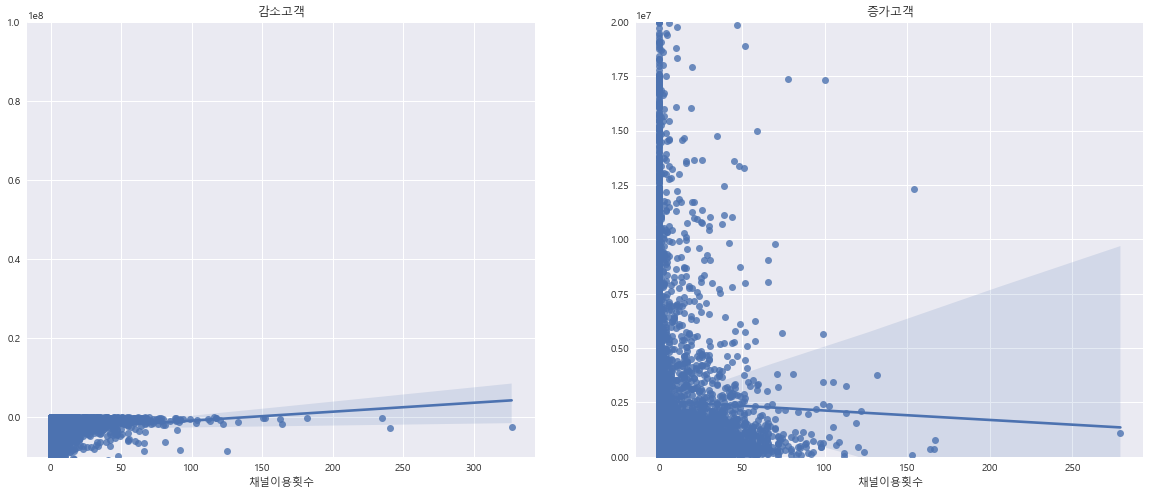

In [54]:
# 채널이용횟수와 증감 사이의 관계
plt.figure(figsize=(20,8))
plt.subplot(1, 2, 1) 
df_down = df1.loc[df1.고객구분 == '감소']
sns.regplot(data=df_down, x='채널이용횟수', y = df_down['이용금액 7분기']-df_down['이용금액 1분기'])
plt.ylim(-0.1*1e8,1*1e8)
plt.title('감소고객')

plt.subplot(1, 2, 2) 
df_up = df1.loc[df1.고객구분 == '증가']
sns.regplot(data=df_up, x='채널이용횟수', y = df_up['이용금액 7분기']-df_up['이용금액 1분기'])
plt.ylim(0,0.2*1e8)
plt.title('증가고객')

Text(0.5, 1.0, '증가고객')

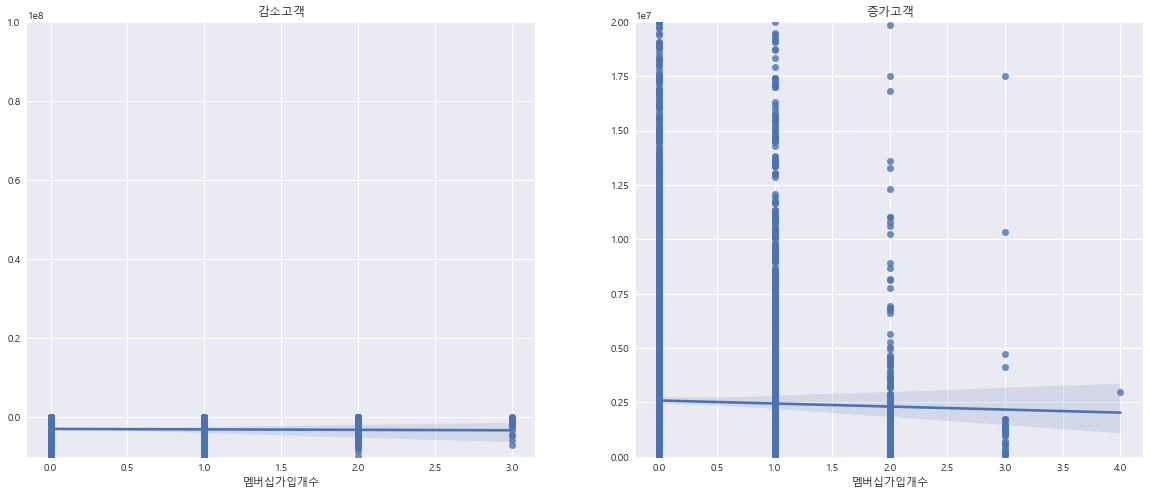

In [55]:
# 멤버십가입개수와 증감 사이의 관계
plt.figure(figsize=(20,8))
plt.subplot(1, 2, 1) 
df_down = df1.loc[df1.고객구분 == '감소']
sns.regplot(data=df_down, x='멤버십가입개수', y = df_down['이용금액 7분기']-df_down['이용금액 1분기'])
plt.ylim(-0.1*1e8,1*1e8)
plt.title('감소고객')

plt.subplot(1, 2, 2) 
df_up = df1.loc[df1.고객구분 == '증가']
sns.regplot(data=df_up, x='멤버십가입개수', y = df_up['이용금액 7분기']-df_up['이용금액 1분기'])
plt.ylim(0,0.2*1e8)
plt.title('증가고객')